In [61]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve

## Importar datos:

In [55]:
datos = pd.read_csv(f'Base_datos_comp_2003_2014.csv', ',', index_col=0)
datos

,LandCover,Wind,DEM,NDVI,Clouds,Temp,Eva,AirTempCategory
405,40.0,4.404931,39.0,0.69,0.473909,27.549194,-0.003469,0
406,40.0,4.108960,49.0,0.77,0.480379,27.544739,-0.003545,0
1328,40.0,3.921639,14.0,0.78,0.538886,27.015350,-0.004009,0
1395,50.0,3.284423,45.0,0.77,0.595392,26.776520,-0.003976,0
1396,11.0,2.966187,79.0,0.78,0.636385,26.358978,-0.004067,0
...,...,...,...,...,...,...,...,...
664657,50.0,1.179073,2368.0,0.81,0.785024,16.397888,-0.003265,0
664716,50.0,0.957614,737.0,0.77,0.786089,20.228333,-0.003138,0
664847,30.0,0.910709,805.0,0.79,0.795860,17.989594,-0.003124,0
664909,50.0,0.887851,1225.0,0.85,0.841868,16.256653,-0.003198,0


In [56]:
X=datos.drop(['AirTempCategory', 'Eva', 'Clouds'],axis=1)
y=datos['AirTempCategory']

In [57]:
from collections import Counter
print('Original dataset shape %s' % Counter(y))
106*100/5028

Original dataset shape Counter({0: 5028, 1: 106})


2.1081941129673827

**Train test split:**

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 109, test_size=0.3)

print('X_train : ')
print(X_train.head())
print('')
print('X_test : ')
print(X_test.head())
print('')
print('y_train : ')
print(y_train.head())
print('')
print('y_test : ')

X_train : 
        LandCover      Wind     DEM  NDVI       Temp
460720       50.0  1.030048  1826.0  0.72  17.966003
96381        50.0  0.963848  1845.0  0.60  18.348328
609407       30.0  0.838720   805.0  0.78  17.589020
331360       50.0  1.098475  1826.0  0.75  17.513245
340336       50.0  1.124450  1079.0  0.63  17.970886

X_test : 
        LandCover      Wind     DEM  NDVI       Temp
81880        50.0  1.481428  1826.0  0.75  19.071533
258349       50.0  0.907592  1225.0  0.78  15.881439
336169      190.0  0.930747  1489.0  0.55  16.490600
275374       50.0  0.908780  1444.0  0.82  17.338135
108985       50.0  0.928076  1587.0  0.80  18.436096

y_train : 
460720    0
96381     0
609407    0
331360    0
340336    0
Name: AirTempCategory, dtype: int64

y_test : 


In [59]:
# y_test.value_counts()
y_train.value_counts()

0    3529
1      64
Name: AirTempCategory, dtype: int64

## Desbalance:

Para problemas de clasificación se emplea_:

**Regresión logística**: Es un método de clasifcación que aplica técnicas estadísticas para medir la
relación de la etiqueta de clase con el resto de características de la muestra. La regresión logística
modela la probabilidad de pertenecer a cada clase mediante la ecuación:


El accuracy indica cuántas veces el modelo fue correcto en general. La precision es qué tan bueno es el modelo para predecir una categoría específica. La recall le dice cuántas veces el modelo pudo detectar una categoría específica.

In [63]:
# setting up testing and training sets
kfold = KFold(n_splits=5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=90) #El test size influye muchopuesto que puede que haya grupos que queden sin categor[ia 1
lr = LogisticRegression(class_weight='balanced')
results = cross_val_score(lr, X_train, y_train, cv=kfold, scoring='roc_auc')
print(results)
print('La precisión del modelo es:', np.round(results.mean()*100, 2), '%') # SE tiene problemas de varianza

model_1= lr.fit(X_train, y_train)
y_test_pred = model_1.predict(X_test)
print(Counter(y_test_pred))  

mc= confusion_matrix(y_test, y_test_pred)
print(mc)
print (classification_report(y_test, y_test_pred))

[0.33046415 0.49469697 0.40883191 0.48121469 0.39856603]
La precisión del modelo es: 42.28 %
Counter({0: 906, 1: 635})
[[894 622]
 [ 12  13]]
              precision    recall  f1-score   support

           0       0.99      0.59      0.74      1516
           1       0.02      0.52      0.04        25

    accuracy                           0.59      1541
   macro avg       0.50      0.55      0.39      1541
weighted avg       0.97      0.59      0.73      1541



In [14]:
kfold = KFold(n_splits=10)
kfold

KFold(n_splits=10, random_state=None, shuffle=False)

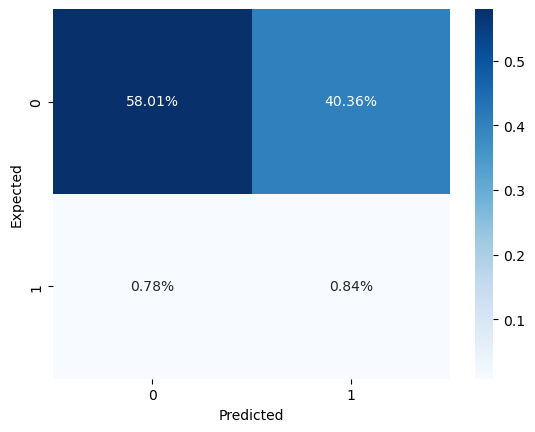

In [15]:
matrix = confusion_matrix(y_test, y_test_pred)

sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

**KNeighborsClassifier:** Usa la proximidad para hacer predicciones sob r eun grupo de datos.

In [16]:
# setting up testing and training sets
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2) #El test size influye muchopuesto que puede que haya grupos que queden sin categor[ia 1
knn = KNeighborsClassifier(n_neighbors=2, weights='distance', algorithm='auto', leaf_size=15, p=1000, metric='manhattan', metric_params=None, n_jobs=10) #manhattan, correlation
results = cross_val_score(knn, X_train_2, y_train_2, cv=10, scoring='roc_auc')
print(results)
print('La precisión del modelo es:', np.round(results.mean()*100, 2), '%') # SE tiene problemas de varianza FALL COMPLETAMENTE

model= knn.fit(X_train_2, y_train_2)
y_test_pred_2 = model.predict(X_test_2)
print(Counter(y_test_pred_2))  

mc= confusion_matrix(y_test_2, y_test_pred_2)
print(mc)
print (classification_report(y_test, y_test_pred))

[0.48507463 0.64731896 0.59314538 0.48134328 0.5331675  0.54256495
 0.53566085 0.52369077 0.48129676 0.53837628]
La precisión del modelo es: 53.62 %
Counter({0: 998, 1: 29})
[[983  29]
 [ 15   0]]
              precision    recall  f1-score   support

           0       0.99      0.59      0.74      1516
           1       0.02      0.52      0.04        25

    accuracy                           0.59      1541
   macro avg       0.50      0.55      0.39      1541
weighted avg       0.97      0.59      0.73      1541



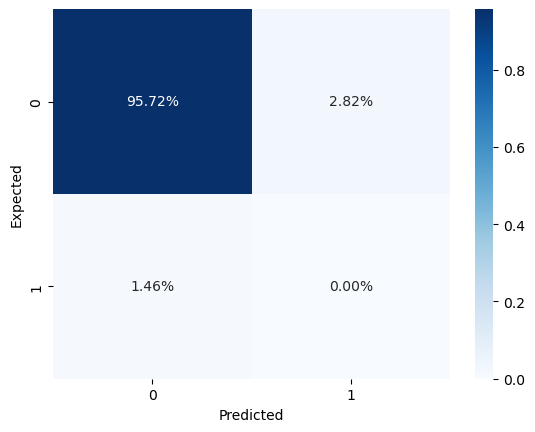

In [17]:
matrix = confusion_matrix(y_test_2, y_test_pred_2)

sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

## Tecnicas de preprocesado:

<AxesSubplot: xlabel='Temp', ylabel='Wind'>

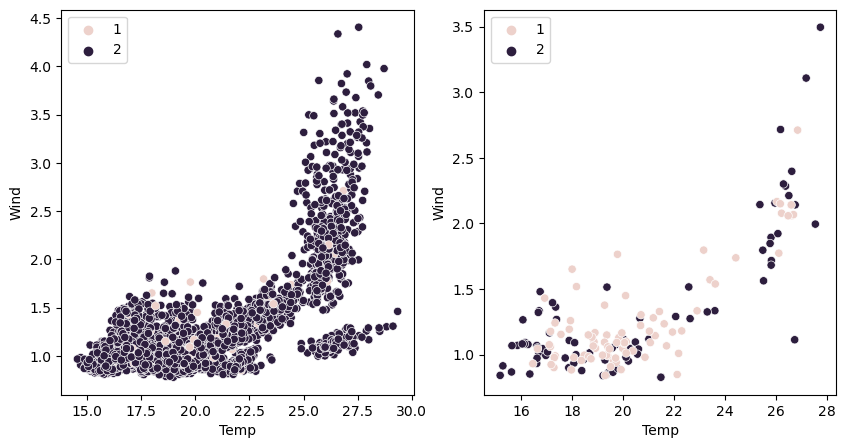

In [18]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy='majority', random_state=90, replacement=True)

X_rus,y_rus=rus.fit_resample(X_train, y_train)

y_t= np.where(y_train == 0, 2, y_train)
y_r= np.where(y_rus   == 0, 2, y_rus)

f, axes = plt.subplots(1, 2, figsize=(10,5))

sns.scatterplot(x = X_train['Temp'], y = X_train['Wind'], hue = y_t, ax = axes[0])
sns.scatterplot(x = X_rus['Temp'],   y = X_rus['Wind'],   hue = y_r, ax = axes[1])

In [19]:
model_rus=LogisticRegression(class_weight='roc_auc').fit(X_rus,y_rus)
y_test_pred=model_rus.predict(X_test)
mc= confusion_matrix(y_test, y_test_pred)
print(Counter(y_test_pred))
print(mc)
print (classification_report(y_test, y_test_pred))

Counter({0: 866, 1: 675})
[[856 660]
 [ 10  15]]
              precision    recall  f1-score   support

           0       0.99      0.56      0.72      1516
           1       0.02      0.60      0.04        25

    accuracy                           0.57      1541
   macro avg       0.51      0.58      0.38      1541
weighted avg       0.97      0.57      0.71      1541



<AxesSubplot: xlabel='Temp', ylabel='Wind'>

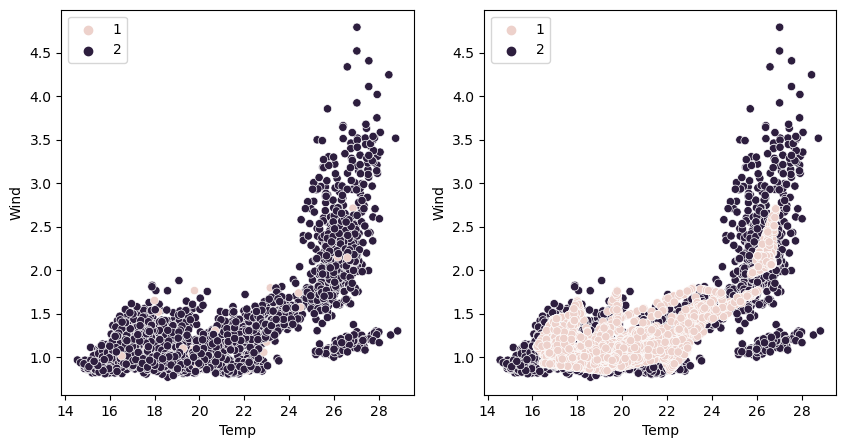

In [20]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()

X_sm, y_sm = sm.fit_resample(X_train_2, y_train_2)

y_t= np.where(y_train_2 == 0, 2, y_train_2)
y_r= np.where(y_sm   == 0, 2, y_sm)

f, axes = plt.subplots(1, 2, figsize=(10,5))
sns.scatterplot(x = X_train_2['Temp'], y = X_train_2['Wind'], hue=y_t, ax=axes[0])
sns.scatterplot(x = X_sm['Temp'],    y = X_sm['Wind'],    hue=y_r, ax=axes[1])

In [21]:
model=LogisticRegression().fit(X_sm, y_sm)
y_test_pred = model.predict(X_test_2)
mc= confusion_matrix(y_test_2, y_test_pred)
print(Counter(y_test_pred))
print(mc)
print (classification_report(y_test_2, y_test_pred))

Counter({0: 565, 1: 462})
[[555 457]
 [ 10   5]]
              precision    recall  f1-score   support

           0       0.98      0.55      0.70      1012
           1       0.01      0.33      0.02        15

    accuracy                           0.55      1027
   macro avg       0.50      0.44      0.36      1027
weighted avg       0.97      0.55      0.69      1027



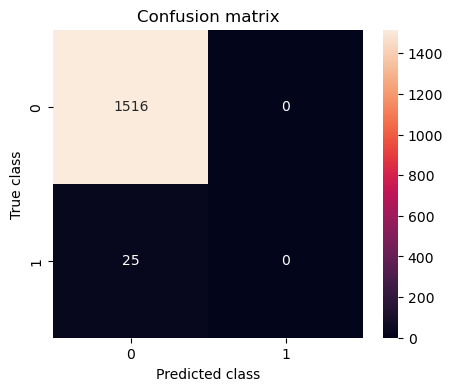

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1516
           1       0.00      0.00      0.00        25

    accuracy                           0.98      1541
   macro avg       0.49      0.50      0.50      1541
weighted avg       0.97      0.98      0.98      1541



In [22]:
#creamos una función que crea el modelo que usaremos cada vez
def run_model(X_train, X_test, y_train, y_test):
    clf_base = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
    clf_base.fit(X_train, y_train)
    return clf_base
 
#ejecutamos el modelo "tal cual"
model = run_model(X_train, X_test, y_train, y_test)
 
#definimos funciona para mostrar los resultados
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))
 
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

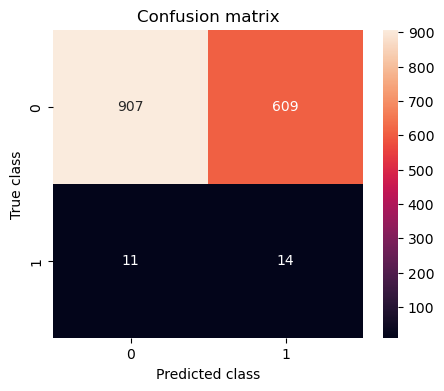

              precision    recall  f1-score   support

           0       0.99      0.60      0.75      1516
           1       0.02      0.56      0.04        25

    accuracy                           0.60      1541
   macro avg       0.51      0.58      0.39      1541
weighted avg       0.97      0.60      0.73      1541



In [23]:
def run_model_balanced(X_train, X_test, y_train, y_test):
    clf = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg",class_weight="balanced")
    clf.fit(X_train, y_train)
    return clf
 
model = run_model_balanced(X_train, X_test, y_train, y_test)
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

Distribution before resampling Counter({0: 3512, 1: 81})
Distribution after resampling Counter({0: 81, 1: 81})


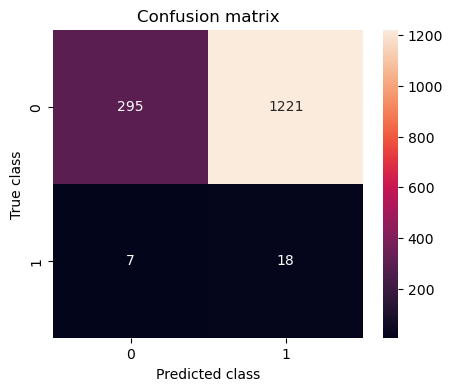

              precision    recall  f1-score   support

           0       0.98      0.19      0.32      1516
           1       0.01      0.72      0.03        25

    accuracy                           0.20      1541
   macro avg       0.50      0.46      0.18      1541
weighted avg       0.96      0.20      0.32      1541



In [24]:
from imblearn.under_sampling import NearMiss

us = NearMiss()
X_train_res, y_train_res = us.fit_resample(X_train, y_train)
 
print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution after resampling {}".format(Counter(y_train_res)))
 
model = run_model(X_train_res, X_test, y_train_res, y_test)
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

Distribution before resampling Counter({0: 3512, 1: 81})
Distribution after resampling Counter({0: 3437, 1: 3437})


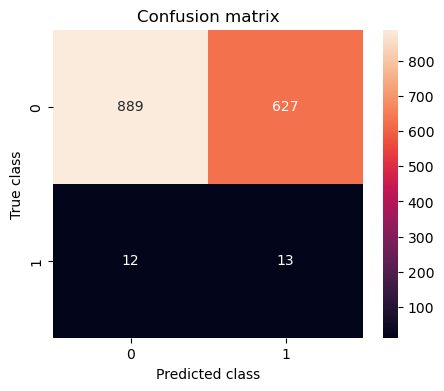

              precision    recall  f1-score   support

           0       0.99      0.59      0.74      1516
           1       0.02      0.52      0.04        25

    accuracy                           0.59      1541
   macro avg       0.50      0.55      0.39      1541
weighted avg       0.97      0.59      0.72      1541



In [26]:
from imblearn.combine import SMOTETomek

os_us = SMOTETomek()
X_train_res, y_train_res = os_us.fit_resample(X_train, y_train)
 
print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution after resampling {}".format(Counter(y_train_res)))
 
model = run_model(X_train_res, X_test, y_train_res, y_test)
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

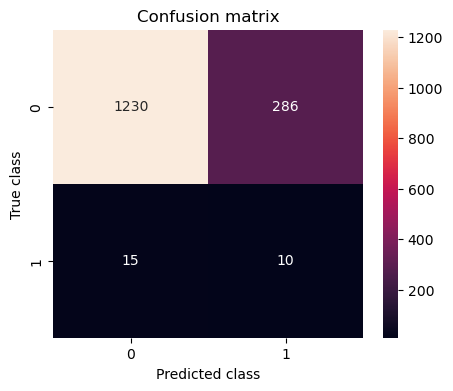

              precision    recall  f1-score   support

           0       0.99      0.81      0.89      1516
           1       0.03      0.40      0.06        25

    accuracy                           0.80      1541
   macro avg       0.51      0.61      0.48      1541
weighted avg       0.97      0.80      0.88      1541



In [27]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)
 
#Train the classifier.
bbc.fit(X_train, y_train)
pred_y = bbc.predict(X_test)
mostrar_resultados(y_test, pred_y)

## Selección de hiperparámetros:

### Curva de validación con Sklearn

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.model_selection import cross_validate
import warnings
warnings.simplefilter("ignore")

In [31]:
# results = cross_validate(KNeighborsRegressor(n_neighbors=15), X, y, cv=5)

In [32]:
# from sklearn.model_selection import validation_curve

# train_scores, test_scores = validation_curve(KNeighborsRegressor(), X, y, param_name='n_neighbors', param_range=k, cv=6)

In [33]:
# k = np.arange(2,100,2)
# plt.figure()
# plt.title("Curva de validación (KNeighbors)")    
# plt.xlabel("k")
# plt.ylabel("Score")
# plt.plot(np.mean(train_scores,axis=1),label="Entrenamiento")
# plt.plot(np.mean(test_scores,axis=1),label="Validación")
# plt.ylim(-0.7, 0.7)
# plt.xlim(0, 5)
# plt.xticks(np.arange(0, 20, 4))
# plt.legend(loc="best")
# plt.grid(True); 

Los resultados señalan que el mejor desempeño lo tiene para un valor de K=5. A medida que aumenta el número de K el desempeño del modelo, tanto para el entrenamiento como para la validación, se reduce. Se tiene mucho Bias.

In [ ]:
from sklearn.datasets import load_digits
from sklearn.svm import SVC

In [ ]:
# param_range = np.logspace(-6, -1, 5)
# train_scores, test_scores = validation_curve(SVC(), X, y, param_name="gamma", param_range=param_range,
#     cv=5, scoring="recall", n_jobs=1)
# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)

In [35]:
# subset_mask = np.isin(y, [1, 2])  # binary classification: 1 vs 2
# # X, y = X[subset_mask], y[subset_mask]

# param_range = np.logspace(-6, -1, 5)
# train_scores, test_scores = validation_curve(SVC(),  X, y, param_name="gamma", param_range=param_range, scoring="accuracy", n_jobs=2)
# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)

# plt.title("Validation Curve with SVM")
# plt.xlabel(r"$\gamma$")
# plt.ylabel("Score")
# # plt.ylim(0.0, 1.1)
# lw = 2
# plt.semilogx(param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw)
# plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="darkorange", lw=lw)
# plt.semilogx(param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw)
# plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="navy", lw=lw)
# plt.legend(loc="best")
# plt.show()

In [38]:
from yellowbrick.model_selection import ValidationCurve

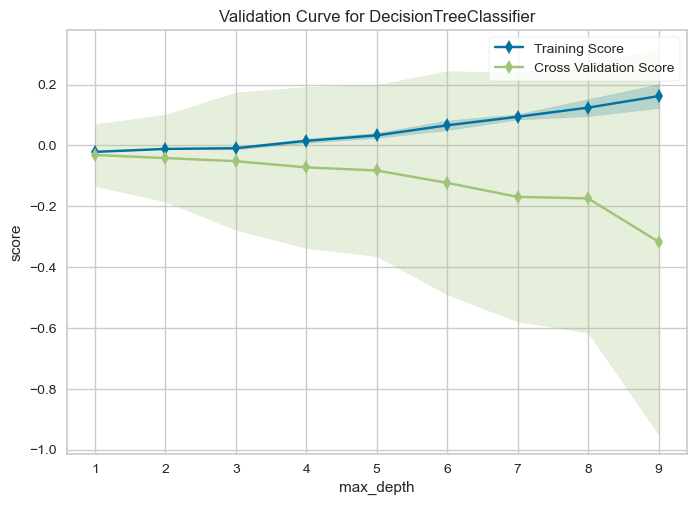

In [39]:
from sklearn.tree import DecisionTreeClassifier
viz = ValidationCurve(DecisionTreeClassifier(), param_name="max_depth", param_range=np.arange(1, 10), cv=100, scoring="r2")
viz.fit(X, y)
viz.show();

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
alphas = np.array([310, 100, 10,1,0.1,0.01,0.001,0.0001,0])
param_grid = dict(alpha=alphas)
model = Lasso()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, y)
print(grid.best_score_)
print(grid.best_estimator_.alpha)

-0.0051418388991134375
310.0


In [42]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [43]:
param_grid = {'alpha': uniform()}
model = Ridge()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, random_state=1)
rsearch.fit(X, y)
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

-0.0065724654297009575
0.9888610889064947


In [44]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [45]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
param_grid = {'alpha': uniform()}
model = Lasso()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, random_state=20)
rsearch.fit(X, y,)
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

-0.005302206663513953
0.9497790261143028


## Curva ROC:

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

kfold = KFold(n_splits=4)
model = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=None, min_samples_split=10, min_samples_leaf=4, min_weight_fraction_leaf=0, max_features='log2', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=10, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

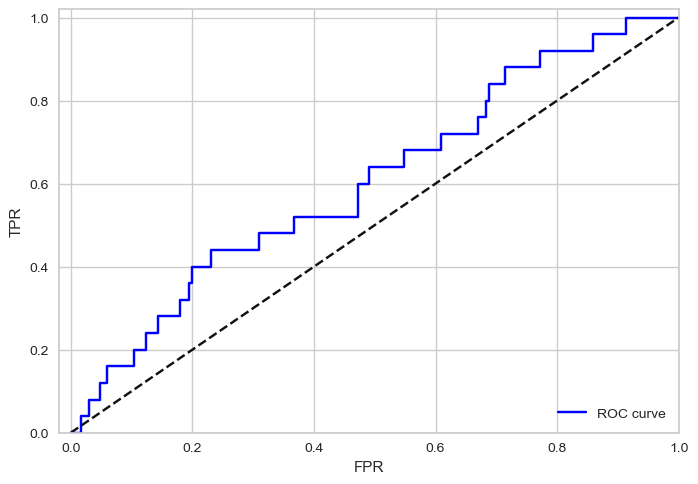

In [65]:
from sklearn.metrics import roc_curve

model = LogisticRegression()
probs = model_1.predict_proba(X_test)
y_pred_proba = probs[:,1]

fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr, label='ROC curve', color='blue')
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.02,1.0])
plt.ylim([0.0,1.02])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4);

In [66]:
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'threshold' : pd.Series(threshold, index = i)})

         fpr   tpr     1-fpr        tf  threshold
28  0.472296  0.52  0.527704 -0.007704   0.490388


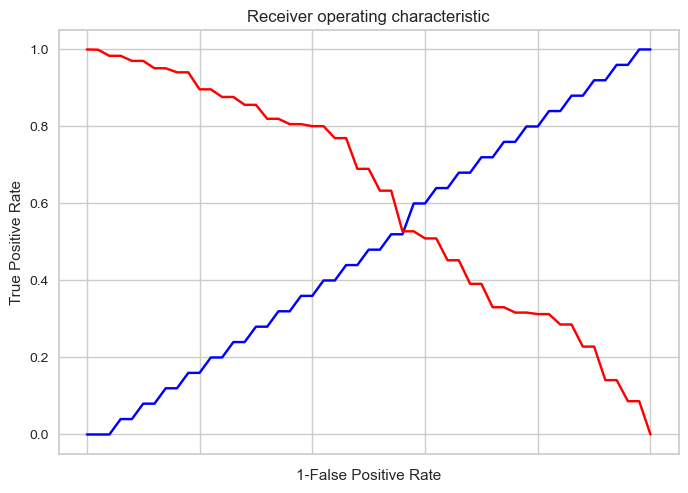

In [74]:
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'threshold' : pd.Series(threshold, index = i)})
best=roc.iloc[(roc.tf-0).abs().argsort()[:1]]
print(best)

# Plot tpr vs 1-fpr
fig, ax = plt.subplots()
plt.plot(roc['tpr'],   label='TPR',  color = 'blue')
plt.plot(roc['1-fpr'], color = 'red', label='1-FPR')
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
ax.set_xticklabels([]);

In [103]:
best_threshold=list(best['threshold'])
print(best_threshold)

[0.4903880215816191]


### Curva Precision-Recall

Para casos de clasificación con un desbalance de datos y donde precisamente la clase minoritaria es la de mayor interés, posiblemente la curva Precision-Recall es de mayor información que la curva ROC, ya que en su estimación no cosndera los verdaros negativos. Los cuales corresponden a la mayoría de la clase dominante, por lo tanto el modelo se entreno lo suficientemente bien para predecir dicha clase. Pero en estos casos los errores se encuentran en establecer los falsos negativos, ya que el modelo al tener tan pocos datos de la clase 1 no predice celdas con estas carcaterísticas.

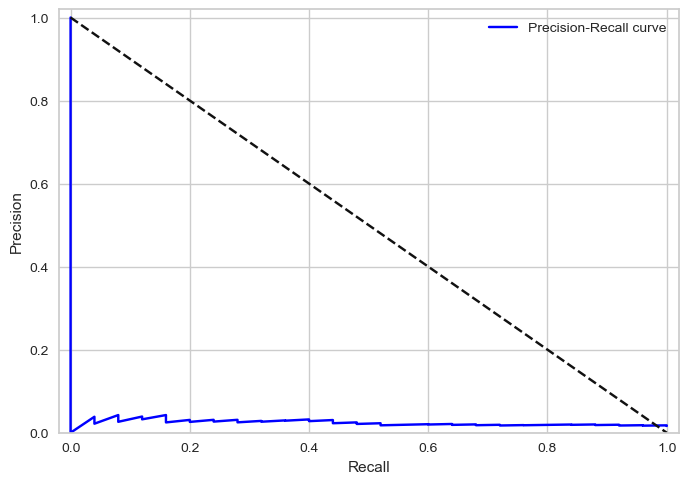

In [88]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision,  label='Precision-Recall curve', color='blue')
plt.plot([0,1],[1,0],'k--')
plt.xlim([-0.02,1.02])
plt.ylim([0.0,1.02])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc=1);

In [89]:
from sklearn.metrics import auc
print(auc(recall, precision))

0.023726539719984823


## Bias - Variance Trade Off

In [93]:
from sklearn.model_selection import learning_curve

lc = learning_curve(KNeighborsClassifier(n_neighbors=20),X_train,y_train,cv=10)
samples, train, test = lc[0], lc[1], lc[2]

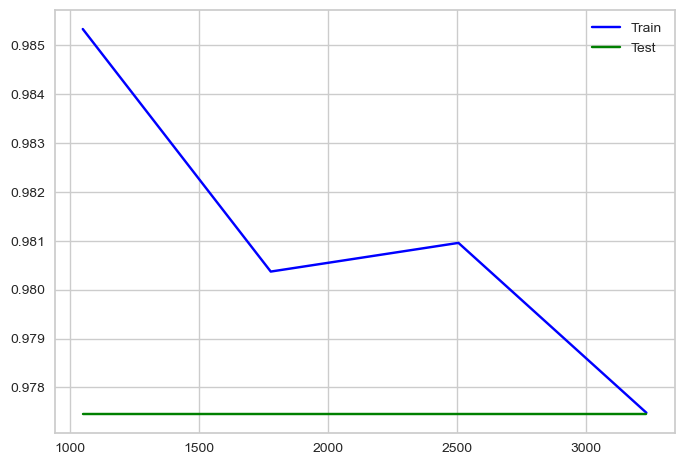

In [98]:
plt.plot(samples[1:],np.mean(train, axis=1)[1:], color = 'blue', label = 'Train')
plt.plot(samples[1:],np.mean(test, axis=1)[1:],  color = 'green', label = 'Test')
plt.legend(loc=1)

In [99]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import ShuffleSplit

In [100]:
estimator = GaussianNB()
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=4, train_sizes=np.linspace(.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

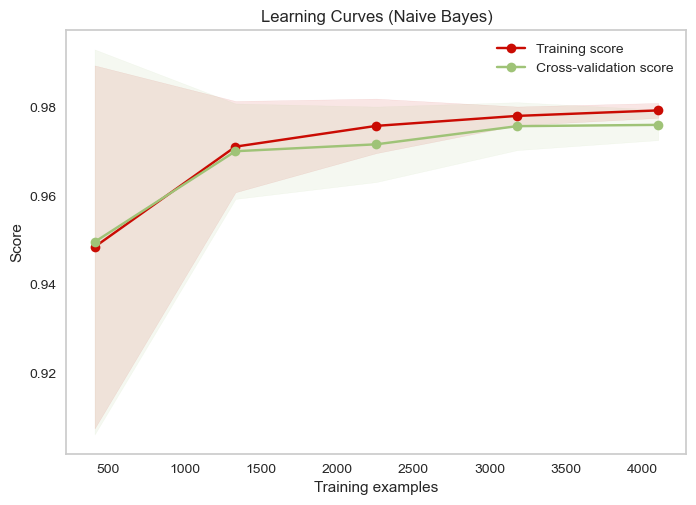

In [101]:
plt.figure()
plt.title("Learning Curves (Naive Bayes)")    
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1,color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best");

In [106]:
from sklearn.model_selection import learning_curve

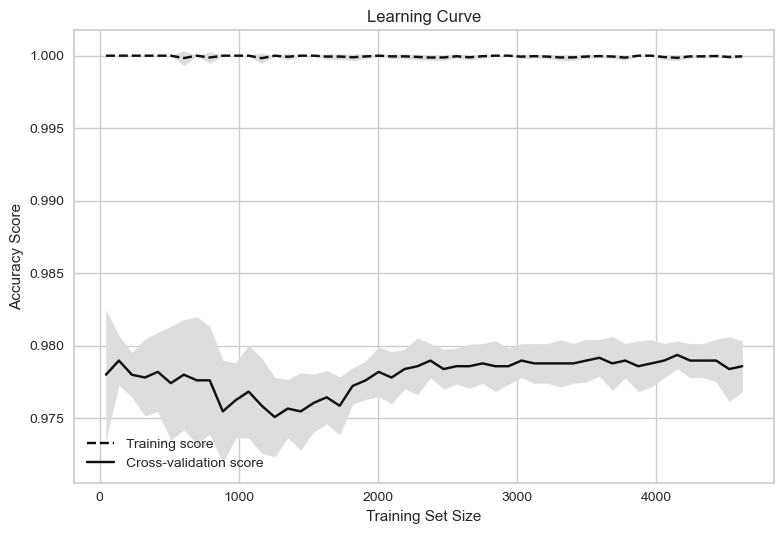

In [107]:
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), X, y,cv=10, scoring='accuracy', n_jobs=-1,train_sizes=np.linspace(0.01, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()